# Support Vector Machine (SVM)

## Basic Concepts

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in high-dimensional spaces and is widely used in pattern recognition, text classification, image recognition, and bioinformatics.

### Linear Separability
SVM finds the hyperplane that best separates classes in a feature space. If the classes are linearly separable, SVM finds the optimal hyperplane with maximum margin, which is the distance between the hyperplane and the nearest data points from each class.

### Kernel Trick
SVM can also handle non-linearly separable data by transforming the input space into a higher-dimensional space through a process called the kernel trick. This allows SVM to find non-linear decision boundaries in the original input space.

### Margin
The margin in SVM refers to the distance between the hyperplane and the closest data point from either class. Maximizing the margin leads to better generalization and helps in reducing overfitting.

### Support Vectors
Support vectors are the data points closest to the hyperplane and have a non-zero influence on determining the hyperplane. These points are critical in defining the decision boundary.

### Regularization Parameter (C)
The regularization parameter (C) in SVM controls the trade-off between maximizing the margin and minimizing the classification error on the training data. A smaller value of C allows for a larger margin but may lead to misclassification of some training examples, while a larger value of C may result in a smaller margin but fewer misclassifications.

### Kernel Functions
Kernel functions are used to implicitly map the input data into a higher-dimensional space. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels. The choice of kernel function depends on the problem domain and the nature of the data.

## Implementation Steps

1. **Data Preprocessing**: SVM requires preprocessing steps such as feature scaling and normalization to ensure that all features contribute equally to the decision boundary.

2. **Model Training**: SVM learns the optimal hyperplane by maximizing the margin between classes. This involves solving an optimization problem using techniques such as quadratic programming.

3. **Kernel Selection**: Choosing the appropriate kernel function is crucial for achieving good classification performance. Experimentation with different kernels and parameters may be necessary to find the best configuration.

4. **Model Evaluation**: Evaluation metrics such as accuracy, precision, recall, F1-score, and ROC curves are used to assess the performance of the SVM model on both training and test datasets. Cross-validation techniques help in estimating the generalization performance of the model.

5. **Hyperparameter Tuning**: Tuning the regularization parameter (C) and kernel parameters is essential for optimizing the SVM model's performance. Techniques like grid search or randomized search can be employed to find the best hyperparameters.

## Analysis

1. **Decision Boundary Visualization**: Visualizing the decision boundary helps in understanding how SVM separates different classes in the feature space.

2. **Impact of Hyperparameters**: Analyzing the effect of varying hyperparameters such as C and kernel parameters on the model's performance provides insights into the trade-offs involved in SVM.

3. **Comparison with Other Algorithms**: Comparing SVM with other classification algorithms like logistic regression, decision trees, or random forests helps in assessing its relative strengths and weaknesses.

4. **Robustness and Generalization**: Testing the SVM model on unseen data and analyzing its performance under different scenarios helps in assessing its robustness and generalization capabilities.

5. **Interpretability**: Understanding the role of support vectors and how they influence the decision boundary can provide insights into the underlying patterns in the data.

## Conclusion

In conclusion, implementing and analyzing classification using SVM algorithm involves understanding its basic concepts, choosing appropriate hyperparameters, evaluating model performance, and interpreting the results to gain insights into the data. SVM offers a powerful framework for solving classification problems, especially in scenarios where the data is high-dimensional or non-linearly separable. By carefully tuning hyperparameters and analyzing the model's behavior, one can build robust and accurate classifiers using SVM.


Dataset used from https://www.kaggle.com/datasets/rakeshrau/social-network-ads

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the datase

In [2]:
df = pd.read_csv('./Social_Network_Ads.csv')
df["Gender"] = np.where(df["Gender"].str.contains("Male", "Female"), 1, 0)
X = df.iloc[:, [1,2,3]].values
y = df.iloc[:, -1].values

### Splitting the dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

### Creating the model (Linear Kernel)

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Predicting using the test set

In [6]:
y_pred = classifier.predict(X_test)


### Evaluating the model

<AxesSubplot:>

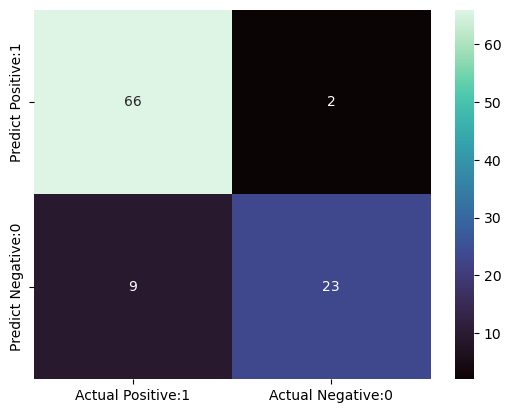

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



### Creating the model (RBF Kernel)

In [9]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

### Predicting using the test set

In [10]:
y_pred = classifier.predict(X_test)

### Evaluating the model

<AxesSubplot:>

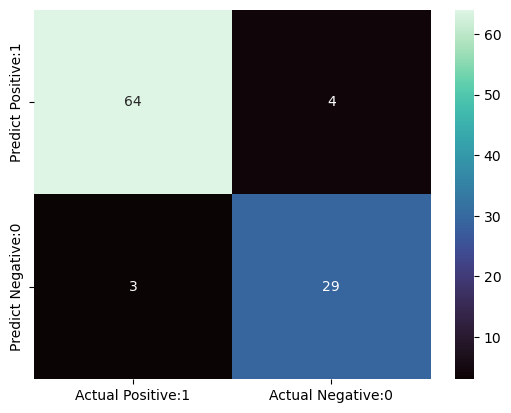

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Creating the model (Polynomial Kernel)

In [13]:
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)

SVC(kernel='poly')

### Predicting using the test set

In [14]:
y_pred = classifier.predict(X_test)

### Evaluating the model

<AxesSubplot:>

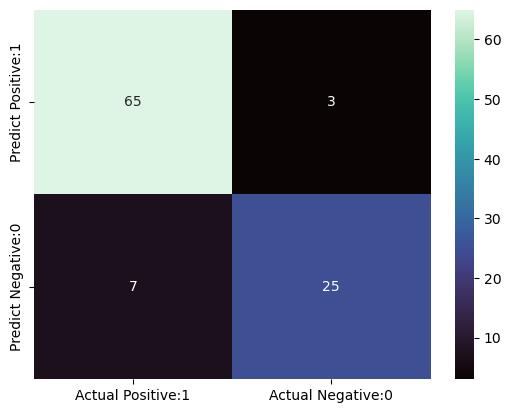

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



### Creating the model (Sigmoid Kernel)

In [17]:
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

### Predicting using the test set

In [18]:
y_pred = classifier.predict(X_test)

### Evaluating the model

<AxesSubplot:>

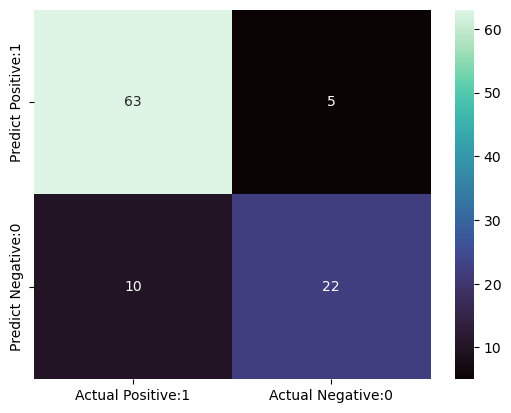

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        68
           1       0.81      0.69      0.75        32

    accuracy                           0.85       100
   macro avg       0.84      0.81      0.82       100
weighted avg       0.85      0.85      0.85       100



In [21]:
import pandas as pd
d={
    'kernels':['linear','rbf','poly','sigmoid'],
    'reasons':["Data that can be seperated by single line","RBF seperates the data which can be represented using more that multi dimension","To classify the polynomial dataset","Similar to creating neural network"]
}
df = pd.DataFrame(d)

# Style the DataFrame to center-align field names
styled_df = df.style.set_properties(**{'text-align': 'left'})

# Display the styled DataFrame
styled_df

,kernels,reasons
0,linear,Data that can be seperated by single line
1,rbf,RBF seperates the data which can be represented using more that multi dimension
2,poly,To classify the polynomial dataset
3,sigmoid,Similar to creating neural network


In [22]:
import pandas as pd

# Set display options to show all columns and set width to None for no truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Define the dictionary with the model, accuracy, and observation
data = {
    'Model': ['KNN', 'SVM (linear)', 'SVM (rbf)', 'SVM (polynomial)', 'SVM (sigmoid)'],
    'Accuracy': [0.92, 0.89, 0.93, 0.90, 0.85],
    'Precision': [0.95 , 0.88, 0.96,0.90,0.86],
    'Recall': [0.92, 0.97, 0.94, 0.96, 0.93],
    'F1-Score': [0.94, 0.92, 0.95, 0.93, 0.89],
    'Observation': [
        "Balanced performance across metrics due to its simple yet effective approach of classifying data points based on nearest neighbors.",
        "Lower accuracy may be due to the linear separation of classes, but high recall suggests effective identification of positive cases.",
        "Achieved highest accuracy and precision by effectively capturing complex nonlinear relationships in the data.",
        "Maintained a good balance between precision and recall by effectively capturing nonlinear relationships with a polynomial kernel.",
        "Despite lower accuracy, maintains reasonable precision and recall, possibly due to its ability to capture complex relationships, albeit less effectively compared to other kernels."
    ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Style the DataFrame to center-align field names
styled_df = df.style.set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df


,Model,Accuracy,Precision,Recall,F1-Score,Observation
0,KNN,0.920000,0.950000,0.920000,0.940000,Balanced performance across metrics due to its simple yet effective approach of classifying data points based on nearest neighbors.
1,SVM (linear),0.890000,0.880000,0.970000,0.920000,"Lower accuracy may be due to the linear separation of classes, but high recall suggests effective identification of positive cases."
2,SVM (rbf),0.930000,0.960000,0.940000,0.950000,Achieved highest accuracy and precision by effectively capturing complex nonlinear relationships in the data.
3,SVM (polynomial),0.900000,0.900000,0.960000,0.930000,Maintained a good balance between precision and recall by effectively capturing nonlinear relationships with a polynomial kernel.
4,SVM (sigmoid),0.850000,0.860000,0.930000,0.890000,"Despite lower accuracy, maintains reasonable precision and recall, possibly due to its ability to capture complex relationships, albeit less effectively compared to other kernels."


Conclusion:

In this experiment I've learnt about classification using SVM algorithms. I've also learnt about the different types of SVM kernels. I've also implemented classification using SVM with different type of kernels.